In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('sales-data.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   Sales   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


,Date,Sales
0,2023-01-01,52.490142
1,2023-01-02,50.896298
2,2023-01-03,53.565075
3,2023-01-04,56.501669
4,2023-01-05,51.540170


In [ ]:
# Step 1: Convert 'Date' column to datetime type (if it's not already)
data['Date'] = pd.to_datetime(data['Date'])
# Step 2: Set 'Date' as index
data.set_index('Date', inplace= True)
# Step 3: (Optional) Sort index if needed
data.sort_index(inplace = True)

print(data.head())
print(data.index)


                 Date      Sales
Date                            
2023-01-01 2023-01-01  52.490142
2023-01-02 2023-01-02  50.896298
2023-01-03 2023-01-03  53.565075
2023-01-04 2023-01-04  56.501669
2023-01-05 2023-01-05  51.540170
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Sales   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


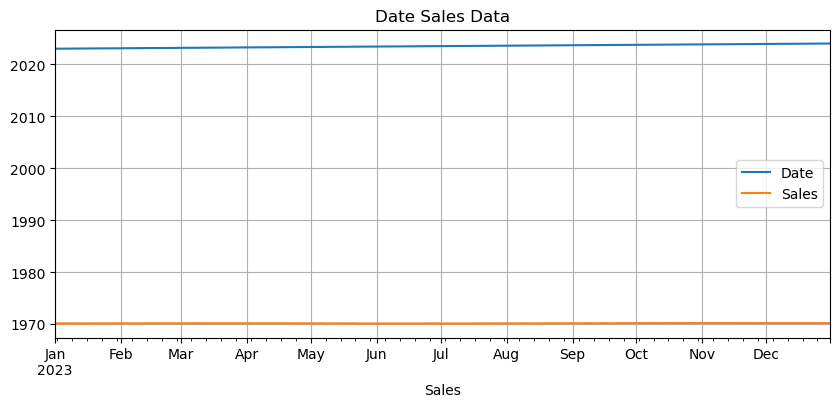

In [16]:
# Visualization of data:
data.plot(figsize=(10,4), title= 'Date Sales Data')
plt.xlabel('Date')
plt.xlabel('Sales')
plt.grid(True)
plt.show()